# Step 1: Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2: Load the Data

In [2]:
# Load the dataset
data = pd.read_csv('user_journey_raw.csv')

# View the first few rows of the dataset
data.head()


,user_id,session_id,subscription_type,user_journey
0,1516,2980231,Annual,Homepage-Log in-Log in-Log in-Log in-Log in-Lo...
1,1516,2980248,Annual,Other-Sign up-Sign up-Sign up-Sign up-Sign up-...
2,1516,2992252,Annual,Log in-Log in-Log in-Log in-Log in-Log in
3,1516,3070491,Annual,Homepage-Log in-Log in-Log in-Log in-Log in-Lo...
4,1516,3709807,Annual,Log in-Log in-Log in-Log in-Log in-Log in-Log ...


# Step 3: Data Exploration

In [3]:
# Check for basic information and missing values
data.info()
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9935 entries, 0 to 9934
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            9935 non-null   int64 
 1   session_id         9935 non-null   int64 
 2   subscription_type  9935 non-null   object
 3   user_journey       9935 non-null   object
dtypes: int64(2), object(2)
memory usage: 310.6+ KB
user_id              0
session_id           0
subscription_type    0
user_journey         0
dtype: int64


In [4]:
# Get unique values in plan_purchased
print(data['subscription_type'].value_counts())

subscription_type
Annual       6533
Monthly      3049
Quarterly     353
Name: count, dtype: int64


# Step 4: Preprocessing the Data

In [5]:
# Check the type of data in the 'user_journey' column
print(type(data['user_journey'][0]))  # Check the type of the first row's 'user_journey'

# If 'user_journey' contains lists, you don't need to split them. Just check that and process accordingly:
if isinstance(data['user_journey'][0], str):
    # Split the journey strings into lists of pages
    data['journey_steps'] = data['user_journey'].apply(lambda x: x.split('-'))
else:
    # If already in list form, no need to split
    data['journey_steps'] = data['user_journey']


<class 'str'>


In [6]:
# Split the journey strings into lists of pages
data['journey_steps'] = data['user_journey']

In [7]:
print(data[['user_journey', 'journey_steps']].head())

                                        user_journey  \
0  Homepage-Log in-Log in-Log in-Log in-Log in-Lo...   
1  Other-Sign up-Sign up-Sign up-Sign up-Sign up-...   
2          Log in-Log in-Log in-Log in-Log in-Log in   
3  Homepage-Log in-Log in-Log in-Log in-Log in-Lo...   
4  Log in-Log in-Log in-Log in-Log in-Log in-Log ...   

                                       journey_steps  
0  Homepage-Log in-Log in-Log in-Log in-Log in-Lo...  
1  Other-Sign up-Sign up-Sign up-Sign up-Sign up-...  
2          Log in-Log in-Log in-Log in-Log in-Log in  
3  Homepage-Log in-Log in-Log in-Log in-Log in-Lo...  
4  Log in-Log in-Log in-Log in-Log in-Log in-Log ...  


In [8]:
# Extract starting and ending pages
data['start_page'] = data['journey_steps'].apply(lambda x: x[0])
data['end_page'] = data['journey_steps'].apply(lambda x: x[-1])


# Step 5: Analyze User Journeys

In [9]:
#Analyzing the Most Common Pages Visited
from collections import Counter
all_pages = [page for journey in data['journey_steps'] for page in journey]
page_counts = Counter(all_pages)
print("Most Common Pages:", page_counts.most_common(10))


Most Common Pages: [('-', 76215), ('e', 75279), ('o', 74333), ('r', 50841), ('u', 48038), ('C', 45968), ('t', 44041), ('c', 42620), ('n', 40736), (' ', 39292)]


In [10]:
data['user_journey'].value_counts().head(10)

user_journey
Log in-Log in                                                              1337
Other-Other                                                                 528
Checkout-Checkout                                                           501
Homepage-Log in-Log in-Log in                                               407
Log in-Log in-Log in-Log in-Log in-Log in                                   318
Log in-Log in-Log in-Log in                                                 291
Checkout-Checkout-Checkout-Checkout                                         281
Coupon-Coupon                                                               215
Checkout-Checkout-Checkout-Checkout-Checkout-Checkout                       195
Checkout-Checkout-Checkout-Checkout-Checkout-Checkout-Checkout-Checkout     173
Name: count, dtype: int64

# Step 6: Visualizing the Most Common Pages Visited

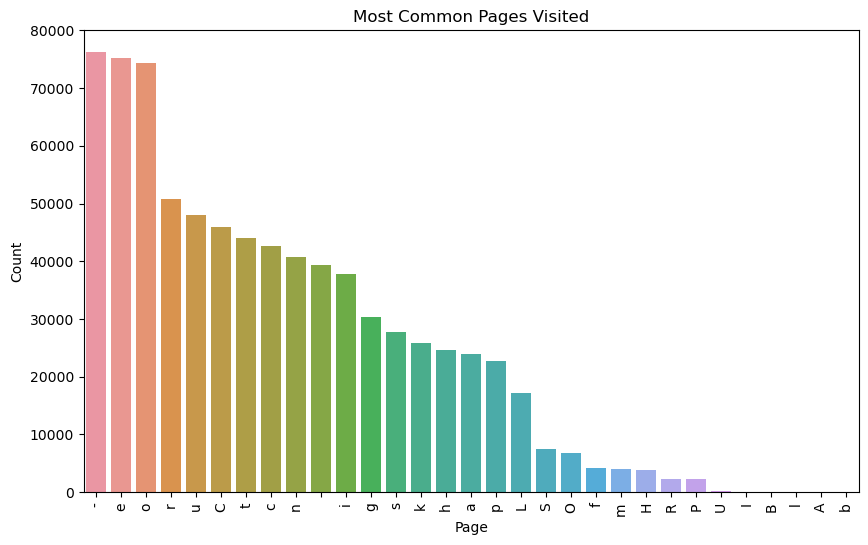

In [11]:
# Convert the Counter object to a pandas Series
page_counts = pd.Series(all_pages).value_counts()

# Create a bar plot to visualize the most common pages visited
plt.figure(figsize=(10, 6))
sns.barplot(x=page_counts.index, y=page_counts.values)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Most Common Pages Visited')
plt.xlabel('Page')
plt.ylabel('Count')
plt.show()


# Step 7: Analyzing the Most Common Journey Sequences

In [12]:
# We join the steps of each journey with '->' to create a string of pages visited
journey_sequences = data['journey_steps'].apply(lambda x: '->'.join(x))
sequence_counts = journey_sequences.value_counts()
sequence_counts

journey_steps
L->o->g-> ->i->n->-->L->o->g-> ->i->n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

# Step 8: Visualizing the Most Common Journey Sequences

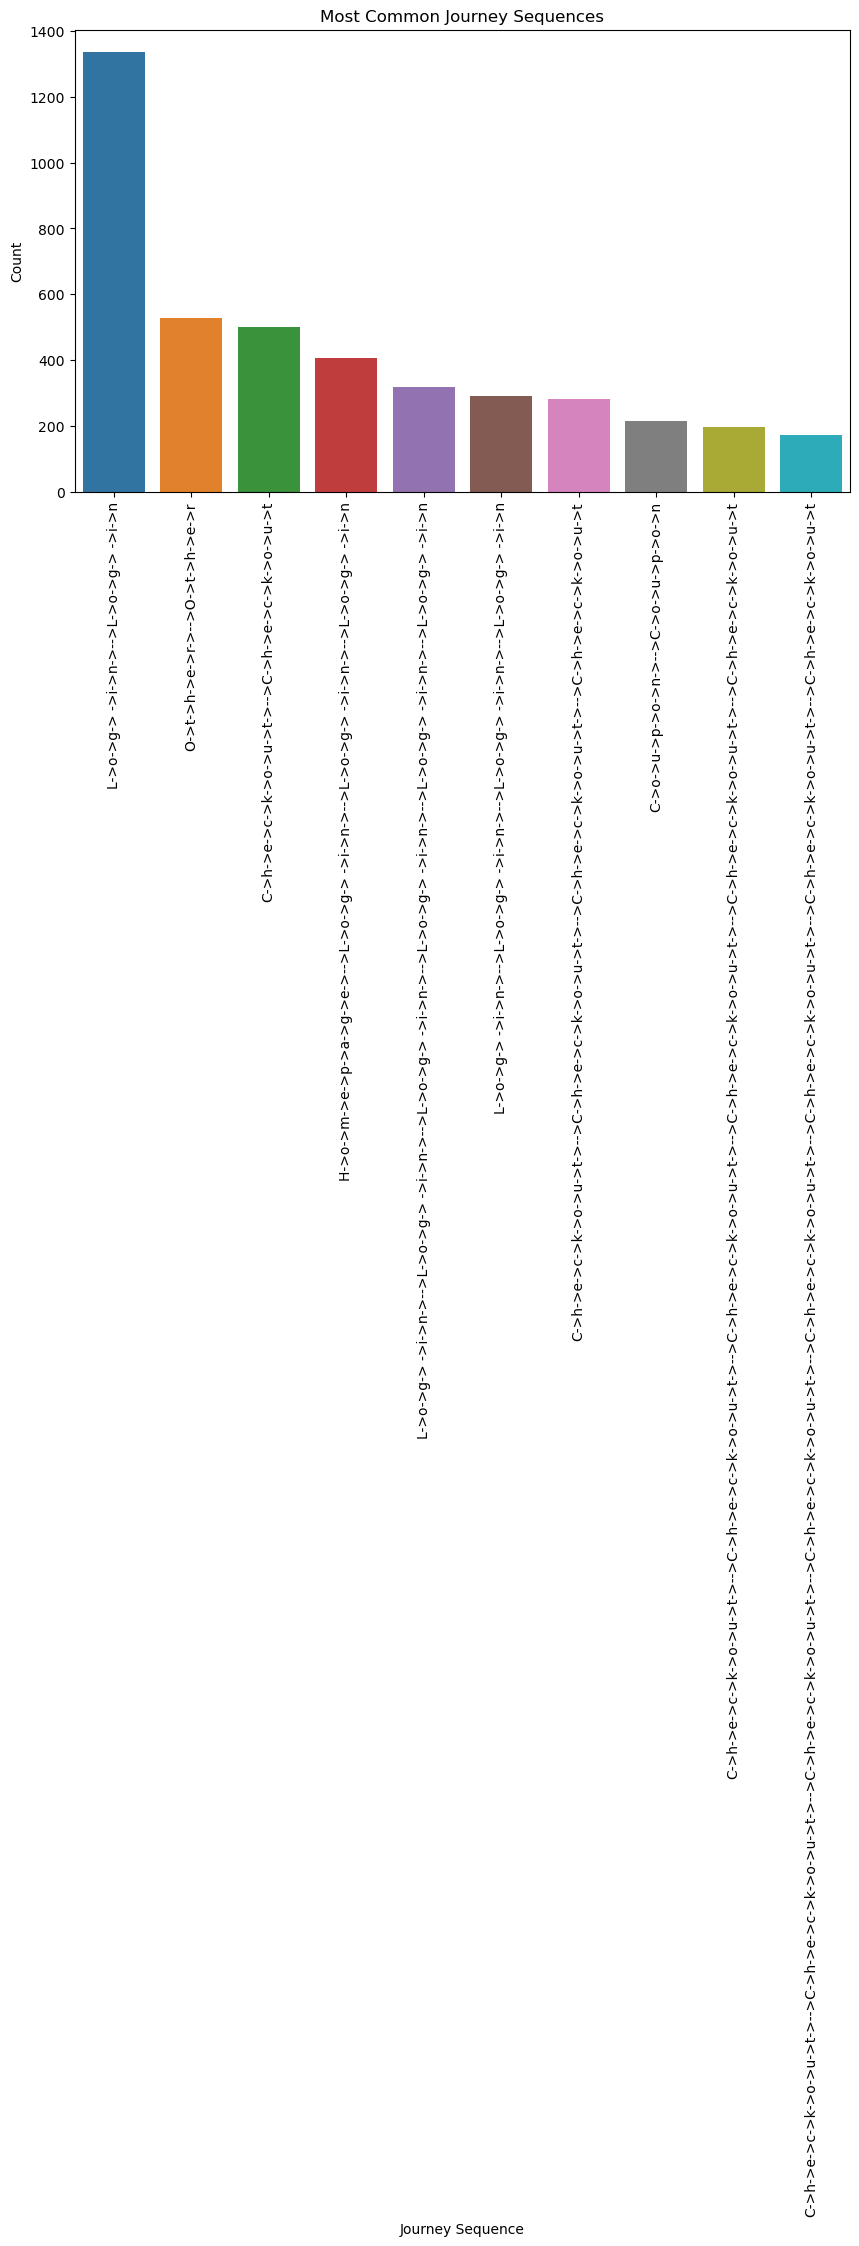

In [13]:
# Create a bar plot to visualize the most common journey sequences
# Display the top 10 sequences
plt.figure(figsize=(10, 6))
sns.barplot(x=sequence_counts.index[:10], y=sequence_counts.values[:10])  # Top 10 sequences
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Most Common Journey Sequences')
plt.xlabel('Journey Sequence')
plt.ylabel('Count')
plt.show()

# Step 9: Identifying Conversion Paths (Pages Before Subscription)

In [14]:
# Let's focus on users who have converted to an annual subscription
converted_users = data[data['subscription_type'] == 'Annual']  # Filter for annual subscribers
converted_journeys = converted_users['journey_steps']
converted_journeys

0       Homepage-Log in-Log in-Log in-Log in-Log in-Lo...
1       Other-Sign up-Sign up-Sign up-Sign up-Sign up-...
2               Log in-Log in-Log in-Log in-Log in-Log in
3       Homepage-Log in-Log in-Log in-Log in-Log in-Lo...
4       Log in-Log in-Log in-Log in-Log in-Log in-Log ...
                              ...                        
9930    Other-Other-Other-Other-Other-Other-Other-Othe...
9931    Other-Other-Other-Other-Other-Other-Other-Othe...
9932                                          Other-Other
9933    Other-Other-Other-Other-Other-Other-Other-Othe...
9934    Other-Other-Other-Other-Other-Other-Coupon-Cou...
Name: journey_steps, Length: 6533, dtype: object

# Step 10: Analyzing First Pages Visited by Converted Users

In [15]:
# Get the first page visited by each user in their journey
first_steps = [journey[0] for journey in converted_journeys]
first_step_counts = pd.Series(first_steps).value_counts()
first_step_counts

C    2193
H    1509
L    1472
O     929
P     151
R     145
S     108
I       9
U       7
A       6
B       4
Name: count, dtype: int64

# Step 11: Visualizing the First Pages for Converted Users

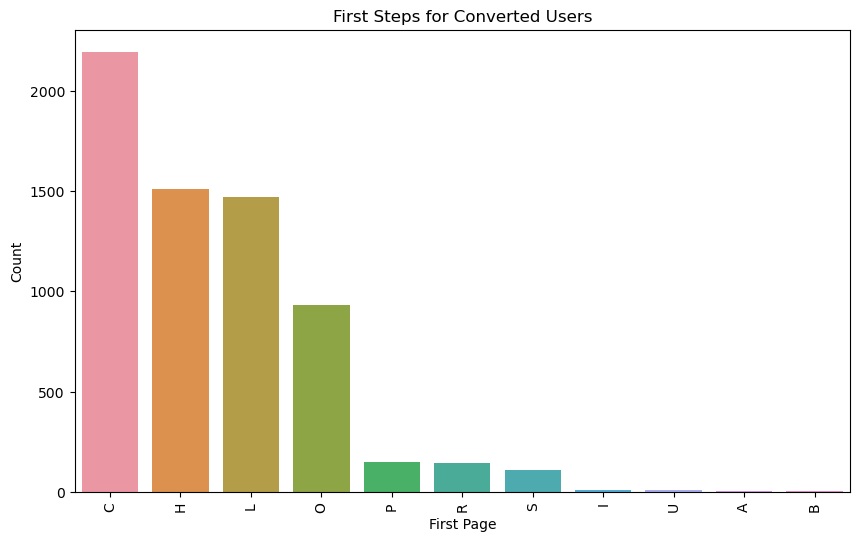

In [16]:
# Create a bar plot to visualize the first steps for converted users
plt.figure(figsize=(10, 6))
sns.barplot(x=first_step_counts.index, y=first_step_counts.values)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('First Steps for Converted Users')
plt.xlabel('First Page')
plt.ylabel('Count')
plt.show()